# Exploratory Analysis - Electric Vehicle Population Data

A continuacion voy a realizar un analisis exploratorio de la base de datos de de vehiculos electricos e hibridos registados en el estado de Washington. La base de datos se descarga de la siguiente [pagina](https://catalog.data.gov/dataset/electric-vehicle-population-data)

A continuacion se listan las columnas y su detalle
* VIN (1-10):  The 1st 10 characters of each vehicle's Vehicle Identification Number (VIN).
* County: This is the geographic region of a state that a vehicle's owner is listed to reside within. Vehicles registered in Washington state may be located in other states.
* City: The city in which the registered owner resides.
* State: This is the geographic region of the country associated with the record. These addresses may be located in other states.
* Postal Code: The 5 digit zip code in which the registered owner resides.
* Model Year: The model year of the vehicle, determined by decoding the Vehicle Identification Number (VIN).
* Make: The manufacturer of the vehicle, determined by decoding the Vehicle Identification Number (VIN).
* Model: The model of the vehicle, determined by decoding the Vehicle Identification Number (VIN).
* Electric Vehicle Type: This distinguishes the vehicle as all electric or a plug-in hybrid.
* Clean Alternative Fuel Vehicle (CAFV) Eligibility: This categorizes a vehicle as a Clean Alternative Fuel Vehicle (CAFV) based on the fuel and electric-only range requirements in House Bill 2042 as passed during the 2019 legislative session.
* Electric Range: Describes how far a vehicle can travel purely on its electric charge.
* Base MSRP: This is the lowest Manufacturer's Suggested Retail Price (MSRP) for any trim level of the model in question.
* Legislative District: The specific section of Washington State that the vehicle's owner resides in, as represented in the state legislature.
* DOL Vehicle ID: Unique number assigned to each vehicle by Department of Licensing for identification purposes.
* Vehicle Location: The center of the ZIP Code for the registered vehicle.
* Electric Utility: This is the electric power retail service territories serving the address of the registered vehicle. All ownership types for areas in Washington are included: federal, investor owned, municipal, political subdivision, and cooperative. If the address for the registered vehicle falls into an area with overlapping electric power retail service territories then a single pipe | delimits utilities of same TYPE and a double pipe || delimits utilities of different types. We combined vehicle address and Homeland Infrastructure Foundation Level Database (HIFLD) (https://gii.dhs.gov/HIFLD) Retail_Service_Territories feature layer using a geographic information system to assign values for this field. Blanks occur for vehicles with addresses outside of Washington or for addresses falling into areas in Washington not containing a mapped electric power retail service territory in the source data.
* 2020 Census Tract: The census tract identifier is a combination of the state, county, and census tract codes as assigned by the United States Census Bureau in the 2020 census, also known as Geographic Identifier (GEOID). More information can be found here: https://www.census.gov/programs-surveys/geography/about/glossary.html#par_textimage_13 https://www.census.gov/programs-surveys/geography/guidance/geo-identifiers.html


In [1]:
## Configuración inicial

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import requests
#from io import StringIO
import os
from datetime import datetime
from pathlib import Path
#Configuracion para la visualizacion
plt.style.use('ggplot')
%matplotlib inline

In [2]:
## Exploración inicial de los datos

# Cargar el dataset
FILE_NAME = 'Electric_Vehicle_Population_Data.csv'
FILE_PATH = Path("../data/raw") / FILE_NAME
df = pd.read_csv(FILE_PATH)



# Mostrar las primeras filas del DataFrame
print("\nPrimeras 5 filas del dataset:")
display(df.head())

# Información sobre el DataFrame
print("\nInformación del dataset:")
df.info()

# Resumen estadístico
print("\nResumen estadístico:")
display(df.describe())

# Verificar valores nulos
print("\nValores nulos por columna:")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Número de valores nulos': missing_values,
    'Porcentaje de valores nulos (%)': missing_percent.round(2)
})
display(missing_df[missing_df['Número de valores nulos'] > 0].sort_values('Número de valores nulos', ascending=False))

## Exploración de las características clave

# Revisar los tipos de columnas y valores únicos
print("\nValores únicos por columna categórica:")
for col in df.columns:      #df.select_dtypes(include=['object']).columns
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} valores únicos")
    if unique_count < 20:  # Solo mostrar si hay pocos valores únicos
        print(f"Valores: {sorted(df[col].unique())}")
    print("-" * 50)




Primeras 5 filas del dataset:


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4JJXP68P,Yakima,Yakima,WA,98901.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,15.0,249905295,POINT (-120.50729 46.60464),PACIFICORP,5.307700e+10
1,1G1FY6S03L,Kitsap,Kingston,WA,98346.0,2020,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,259.0,0.0,23.0,141133765,POINT (-122.4977 47.79802),PUGET SOUND ENERGY INC,5.303594e+10
2,KNDCE3LG9K,King,Seattle,WA,98125.0,2019,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239.0,0.0,46.0,3410074,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1N4AZ0CP8E,Thurston,Olympia,WA,98506.0,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,22.0,182436474,POINT (-122.87741 47.05997),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJXCAE29L,Kitsap,Silverdale,WA,98383.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293.0,0.0,23.0,1843054,POINT (-122.69275 47.65171),PUGET SOUND ENERGY INC,5.303509e+10



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239747 entries, 0 to 239746
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         239747 non-null  object 
 1   County                                             239744 non-null  object 
 2   City                                               239744 non-null  object 
 3   State                                              239747 non-null  object 
 4   Postal Code                                        239744 non-null  float64
 5   Model Year                                         239747 non-null  int64  
 6   Make                                               239747 non-null  object 
 7   Model                                              239747 non-null  object 
 8   Electric Vehicle Type                           

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,239744.000000,239747.000000,239698.000000,239698.000000,239232.000000,2.397470e+05,2.397440e+05
mean,98176.643908,2021.460681,45.562283,770.534110,28.876643,2.363185e+08,5.297838e+10
std,2538.393709,2.995484,83.432590,7096.684269,14.896805,6.765169e+07,1.557184e+09
min,1731.000000,2000.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.071293e+08,5.303301e+10
50%,98126.000000,2023.000000,0.000000,0.000000,32.000000,2.533600e+08,5.303303e+10
75%,98375.000000,2024.000000,38.000000,0.000000,42.000000,2.701756e+08,5.305307e+10
max,99577.000000,2026.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10



Valores nulos por columna:


,Número de valores nulos,Porcentaje de valores nulos (%)
Legislative District,515,0.21
Electric Range,49,0.02
Base MSRP,49,0.02
Vehicle Location,10,0.00
County,3,0.00
City,3,0.00
Postal Code,3,0.00
Electric Utility,3,0.00
2020 Census Tract,3,0.00



Valores únicos por columna categórica:
VIN (1-10): 14122 valores únicos
--------------------------------------------------
County: 214 valores únicos
--------------------------------------------------
City: 793 valores únicos
--------------------------------------------------
State: 47 valores únicos
--------------------------------------------------
Postal Code: 976 valores únicos
--------------------------------------------------
Model Year: 21 valores únicos
--------------------------------------------------
Make: 46 valores únicos
--------------------------------------------------
Model: 173 valores únicos
--------------------------------------------------
Electric Vehicle Type: 2 valores únicos
Valores: ['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)']
--------------------------------------------------
Clean Alternative Fuel Vehicle (CAFV) Eligibility: 3 valores únicos
Valores: ['Clean Alternative Fuel Vehicle Eligible', 'Eligibility unknown as battery 

In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('-', '_').str.replace('(', '').str.replace(')', '')
df.columns

Index(['vin_1_10', 'county', 'city', 'state', 'postal_code', 'model_year',
       'make', 'model', 'electric_vehicle_type',
       'clean_alternative_fuel_vehicle_cafv_eligibility', 'electric_range',
       'base_msrp', 'legislative_district', 'dol_vehicle_id',
       'vehicle_location', 'electric_utility', '2020_census_tract'],
      dtype='object')

In [7]:
# Voy a verificar si hay filas duplicadas
print("\nNúmero de filas duplicadas:")
duplicates = df['vin_1_10'].duplicated().sum()
print(f"Filas duplicadas: {duplicates}")
duplicated_rows = df[df['vin_1_10'].duplicated(keep=False)]

# Ordenarlas por 'vin_1_10'
duplicated_rows_sorted = duplicated_rows.sort_values(by='vin_1_10')
display(duplicated_rows_sorted)


Número de filas duplicadas:
Filas duplicadas: 225625


,vin_1_10,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_cafv_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,2020_census_tract
40992,1C4JJXN60P,King,Tukwila,WA,98188.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,11.0,236609152,POINT (-122.29179 47.43473),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
99033,1C4JJXN60P,King,Renton,WA,98057.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,11.0,240773459,POINT (-122.20489 47.47532),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
38580,1C4JJXN60P,King,Tukwila,WA,98188.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,11.0,237949267,POINT (-122.29179 47.43473),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
211443,1C4JJXN60P,Clark,Camas,WA,98607.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,18.0,252094104,POINT (-122.40199 45.58694),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
54187,1C4JJXN60P,King,Tukwila,WA,98188.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,11.0,236328851,POINT (-122.29179 47.43473),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119072,ZFAFFAC49R,King,Bellevue,WA,98004.0,2024,FIAT,500E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,48.0,276543718,POINT (-122.1872 47.61001),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
231131,ZFAFFAC49R,Pierce,Bonney Lake,WA,98391.0,2024,FIAT,500E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,31.0,277257704,POINT (-122.17144 47.19175),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
77153,ZFAFFAC49R,King,Seattle,WA,98105.0,2024,FIAT,500E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,46.0,270956304,POINT (-122.31307 47.66127),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
221099,ZHWUC1ZM6R,Spokane,Liberty Lake,WA,99019.0,2024,LAMBORGHINI,REVUELTO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6.0,0.0,4.0,278192862,POINT (-117.1015 47.66829),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10


In [4]:
# Previo a realizar una analisis rapido voy a realizar una limpieza de los datos
# Voy a eliminar columnas que no son necesarias para el analisis
# Realizo una copia del dataframe para no modificar el original
df = df.copy()
# Definir las columnas a eliminar
columns_to_drop = ['VIN (1-10)', 'Postal Code', 'Base MSRP','Legislative District', 'Electric Utility', '2020 Census Tract']
# Eliminar las columnas
df.drop(columns=columns_to_drop, inplace=True)
# Veamos los valores nulos
print("\nValores nulos por columna:")
missing_values = df.isnull().sum()
missing_df = pd.DataFrame({
    'Número de valores nulos': missing_values,
})
display(missing_df[missing_df['Número de valores nulos'] > 0].sort_values('Número de valores nulos', ascending=False))

display(df.head())



Valores nulos por columna:


,Número de valores nulos
Electric Range,49
Vehicle Location,10
City,3
County,3


,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,DOL Vehicle ID,Vehicle Location
0,Yakima,Yakima,WA,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,249905295,POINT (-120.50729 46.60464)
1,Kitsap,Kingston,WA,2020,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,259.0,141133765,POINT (-122.4977 47.79802)
2,King,Seattle,WA,2019,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239.0,3410074,POINT (-122.30253 47.72656)
3,Thurston,Olympia,WA,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,182436474,POINT (-122.87741 47.05997)
4,Kitsap,Silverdale,WA,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293.0,1843054,POINT (-122.69275 47.65171)


Analizando la columna 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' vemos que hay tres valores, y uno corresponde a datos desconocidos debido a datos faltantes en el rango de autonomia del vehiculo, entonces eliminando valores nules de  'Electric Range' tambien eliminamos ese tercer valor que no nos aporta nada, y como son solo 49 los valores nulos podemos eliminarlos.

In [5]:
# Eliminamos los valores nulos
df.dropna(inplace=True)
# Veamos que no hay valores nulos
print("\nValores nulos por columna:")
missing_values = df.isnull().sum()
missing_df = pd.DataFrame({
    'Número de valores nulos': missing_values,
})
display(missing_df[missing_df['Número de valores nulos'] >= 0].sort_values('Número de valores nulos', ascending=False))

# Y volvamos a analizar la cantidad de valores unicos
print("\nValores únicos por columna categórica:")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} valores únicos")
    if unique_count < 20:  # Solo mostrar si hay pocos valores únicos
        print(f"Valores: {sorted(df[col].unique())}")
    print("-" * 50)



Valores nulos por columna:


,Número de valores nulos
County,0
City,0
State,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0
Electric Range,0
DOL Vehicle ID,0



Valores únicos por columna categórica:
County: 214 valores únicos
--------------------------------------------------
City: 793 valores únicos
--------------------------------------------------
State: 44 valores únicos
--------------------------------------------------
Model Year: 21 valores únicos
--------------------------------------------------
Make: 46 valores únicos
--------------------------------------------------
Model: 171 valores únicos
--------------------------------------------------
Electric Vehicle Type: 2 valores únicos
Valores: ['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)']
--------------------------------------------------
Clean Alternative Fuel Vehicle (CAFV) Eligibility: 3 valores únicos
Valores: ['Clean Alternative Fuel Vehicle Eligible', 'Eligibility unknown as battery range has not been researched', 'Not eligible due to low battery range']
--------------------------------------------------
Electric Range: 109 valores únicos
--------

In [6]:
# Voy a analizar los valores de 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' mas especificamente los que tienen valor  'Eligibility unknown as battery range has not been researched'
# Voy a filtrar los datos para ver cuántos vehículos tienen este valor
df_cafv_unknown = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Eligibility unknown as battery range has not been researched']
df_cafv_Eligible = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible']
df_cafv_not_Eligible = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Not eligible due to low battery range']
# Veamos cuántos vehículos hay
print("\nNúmero de vehículos con 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' desconocido:")
print(len(df_cafv_unknown))
print("\nNúmero de vehículos con 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' elegible:")
print(len(df_cafv_Eligible))
print("\nNúmero de vehículos con 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' no elegible:")
print(len(df_cafv_not_Eligible))


Número de vehículos con 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' desconocido:
142844

Número de vehículos con 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' elegible:
73905

Número de vehículos con 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' no elegible:
22939


In [7]:
df_cafv_unknown.describe()

,Model Year,Electric Range,DOL Vehicle ID
count,142844.000000,142844.0,1.428440e+05
mean,2023.038077,0.0,2.442181e+08
std,1.095005,0.0,3.412010e+07
min,2008.000000,0.0,1.028289e+08
25%,2022.000000,0.0,2.272187e+08
50%,2023.000000,0.0,2.581015e+08
75%,2024.000000,0.0,2.701983e+08
max,2026.000000,0.0,2.916988e+08


In [8]:
# Veamos los valores unicos de la columna 'Make' y ordenemos por orden alfabetico
print("\nValores únicos por columna 'Make':")
sorted(df['Make'].unique())


Valores únicos por columna 'Make':


['ACURA',
 'ALFA ROMEO',
 'AUDI',
 'AZURE DYNAMICS',
 'BENTLEY',
 'BMW',
 'BRIGHTDROP',
 'CADILLAC',
 'CHEVROLET',
 'CHRYSLER',
 'DODGE',
 'FIAT',
 'FISKER',
 'FORD',
 'GENESIS',
 'GMC',
 'HONDA',
 'HYUNDAI',
 'JAGUAR',
 'JEEP',
 'KIA',
 'LAMBORGHINI',
 'LAND ROVER',
 'LEXUS',
 'LINCOLN',
 'LUCID',
 'MAZDA',
 'MERCEDES-BENZ',
 'MINI',
 'MITSUBISHI',
 'MULLEN AUTOMOTIVE INC.',
 'NISSAN',
 'POLESTAR',
 'PORSCHE',
 'RAM',
 'RIVIAN',
 'ROLLS-ROYCE',
 'SMART',
 'SUBARU',
 'TESLA',
 'TH!NK',
 'TOYOTA',
 'VINFAST',
 'VOLKSWAGEN',
 'VOLVO',
 'WHEEGO ELECTRIC CARS']

In [9]:
# Veamos los valores unicos de la columna 'Model' y ordenemos por orden alfabetico
print("\nValores únicos por columna 'Model':")
sorted(df['Model'].unique())


Valores únicos por columna 'Model':


['330E',
 '500',
 '500E',
 '530E',
 '550E',
 '740E',
 '745E',
 '745LE',
 '750E',
 '918',
 'A3',
 'A7 E',
 'A8 E',
 'ACCORD',
 'AIR',
 'ARIYA',
 'AVIATOR',
 'B-CLASS',
 'BENTAYGA',
 'BLAZER EV',
 'BOLT EUV',
 'BOLT EV',
 'BRIGHTDROP 400',
 'BZ4X',
 'C-CLASS',
 'C-MAX',
 'C40',
 'CAYENNE',
 'CHARGER',
 'CITY',
 'CLARITY',
 'CORSAIR',
 'COUNTRYMAN',
 'CROSSTREK',
 'CT6',
 'CX-70',
 'CX-90',
 'CYBERTRUCK',
 'E-GOLF',
 'E-TRON',
 'E-TRON GT',
 'E-TRON SPORTBACK',
 'EDV',
 'ELR',
 'EQ FORTWO',
 'EQB-CLASS',
 'EQE-CLASS SEDAN',
 'EQE-CLASS SUV',
 'EQS-CLASS SEDAN',
 'EQS-CLASS SUV',
 'EQUINOX EV',
 'ESCAPE',
 'ESPRINTER',
 'EV6',
 'EV9',
 'EX30',
 'EX40',
 'EX90',
 'F-150',
 'FLYING SPUR',
 'FOCUS',
 'FORTWO',
 'FORTWO ELECTRIC DRIVE',
 'FUSION',
 'G-CLASS',
 'G80',
 'GLC-CLASS',
 'GLE-CLASS',
 'GRAND CHEROKEE',
 'GV60',
 'GV70',
 'HARDTOP',
 'HORNET',
 'HUMMER EV PICKUP',
 'HUMMER EV SUV',
 'I-MIEV',
 'I-PACE',
 'I3',
 'I4',
 'I5',
 'I7',
 'I8',
 'ID. BUZZ',
 'ID.4',
 'IONIQ',
 'IONIQ 5',
 '

In [11]:
# Veamos los valores unicos de la columna 'Model Year' 
print("\nValores únicos por columna 'Model Year':")
sorted(df['Model Year'].unique())


Valores únicos por columna 'Model Year':


[np.int64(2000),
 np.int64(2002),
 np.int64(2003),
 np.int64(2008),
 np.int64(2010),
 np.int64(2011),
 np.int64(2012),
 np.int64(2013),
 np.int64(2014),
 np.int64(2015),
 np.int64(2016),
 np.int64(2017),
 np.int64(2018),
 np.int64(2019),
 np.int64(2020),
 np.int64(2021),
 np.int64(2022),
 np.int64(2023),
 np.int64(2024),
 np.int64(2025),
 np.int64(2026)]

In [119]:
# Veamos cuantos vehiculos 'Battery Electric Vehicle (BEV)' con 'Electric Range' igual a 0 hay
df_battery_electric = df[df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']
df_battery_electric_zero_range = df_battery_electric[df_battery_electric['Electric Range'] == 0]

print("\nNúmero de vehículos 'Battery Electric Vehicle (BEV)' con 'Electric Range' igual a 0:")
print(len(df_battery_electric_zero_range))


Número de vehículos 'Battery Electric Vehicle (BEV)' con 'Electric Range' igual a 0:
142844


Todos los vehiculos 'Eligibility unknown as battery range has not been researched' son vehiculos electricos en los que figura rango de autonomia cero, lo cual no tiene sentido.

Veamos si hay vehiculos iguales con distintos rangos de autonomia

In [120]:
summary = (
    df.groupby(['Model Year','Make','Model'])['Electric Range'].agg(lambda serie: sorted(serie.unique())).reset_index(name='ranges')
)

# Filtrar sólo los grupos con más de un rango distinto
summary = summary[summary['ranges'].apply(len) > 1]

print("== Resumen de grupos con múltiples rangos ==")
print(summary)


# ————————————————————————————————
# Ahora recuperamos las filas originales de esos grupos
#    Hacemos merge con solo las claves de summary
keys = ['Model Year','Make','Model']
resultado = df.merge(summary[keys], on=keys, how='inner')

#print("\n== Todas las filas de esos grupos ==")
#print(resultado[keys + ['Electric Range']].sort_values(keys).to_string(index=False))

== Resumen de grupos con múltiples rangos ==
     Model Year        Make                  Model              ranges
3          2008       TESLA               ROADSTER        [0.0, 220.0]
29         2014         BMW                     I3        [72.0, 81.0]
43         2014       SMART  FORTWO ELECTRIC DRIVE        [58.0, 68.0]
47         2015         BMW                     I3        [72.0, 81.0]
68         2016         BMW                     I3        [72.0, 81.0]
..          ...         ...                    ...                 ...
490        2024     PORSCHE                CAYENNE  [43.0, 55.0, 56.0]
491        2024     PORSCHE                  MACAN      [288.0, 308.0]
517        2025        AUDI                   Q5 E        [23.0, 28.0]
552        2025         KIA                   NIRO         [0.0, 33.0]
556        2025  LAND ROVER      RANGE ROVER SPORT        [58.0, 60.0]

[65 rows x 4 columns]


In [121]:
# Veamos en cuantos hay vehiculos con rango 0

bad_groups = summary[summary['ranges'].apply(lambda lst: 0 in lst)]

# Ver qué grupos son:
print("Grupos con rango 0:")
print(bad_groups.to_string(index=False))


print("\nFilas con rango 0 en esos grupos:")
print(len(resultado[resultado['Electric Range'] == 0]))	


Grupos con rango 0:
 Model Year    Make            Model              ranges
       2008   TESLA         ROADSTER        [0.0, 220.0]
       2019   SMART        EQ FORTWO         [0.0, 58.0]
       2020  NISSAN             LEAF [0.0, 149.0, 215.0]
       2021    AUDI           E-TRON        [0.0, 222.0]
       2021    AUDI E-TRON SPORTBACK        [0.0, 218.0]
       2021     BMW               I3 [0.0, 126.0, 153.0]
       2021 HYUNDAI            IONIQ         [0.0, 29.0]
       2021     KIA             NIRO         [0.0, 26.0]
       2021 PORSCHE           TAYCAN [0.0, 192.0, 203.0]
       2022     KIA             NIRO         [0.0, 26.0]
       2023     KIA             NIRO         [0.0, 33.0]
       2024     KIA             NIRO         [0.0, 33.0]
       2025     KIA             NIRO         [0.0, 33.0]

Filas con rango 0 en esos grupos:
2111


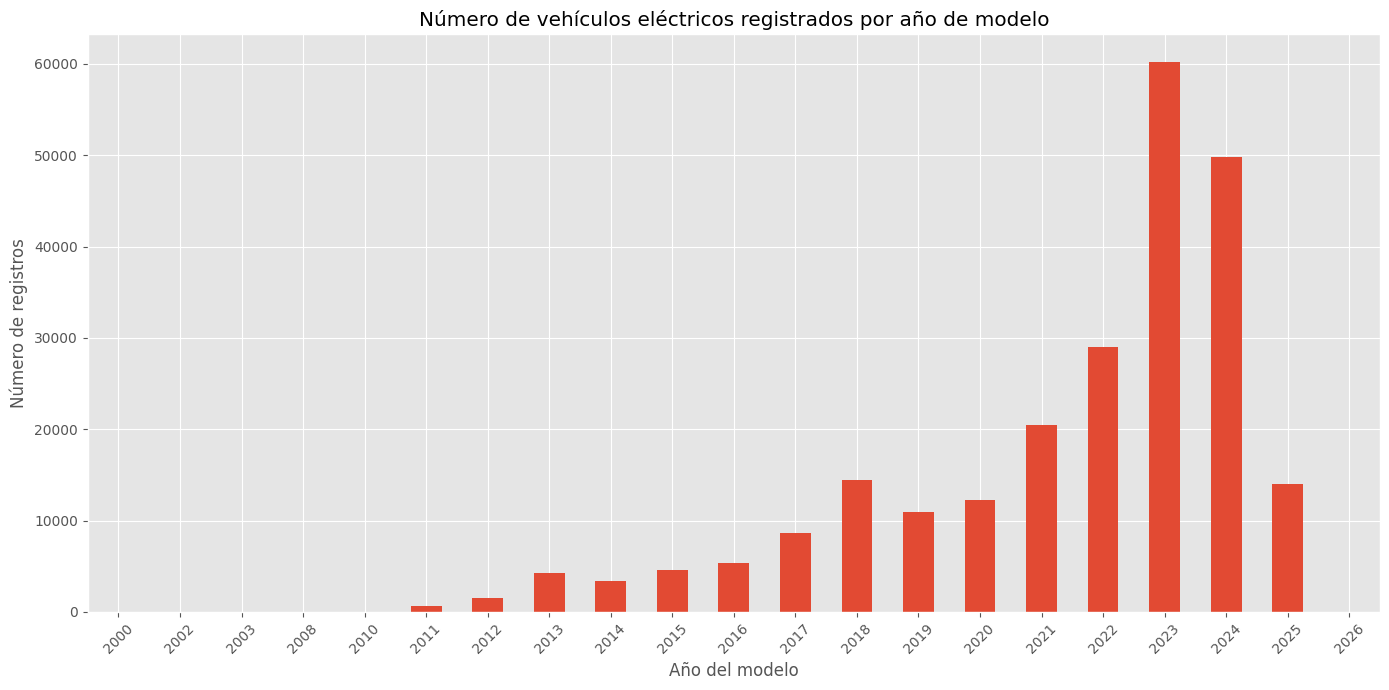

C:\Users\gfisc\AppData\Local\Temp\ipykernel_15212\2355740982.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_models.values, y=top_models.index, palette='viridis')


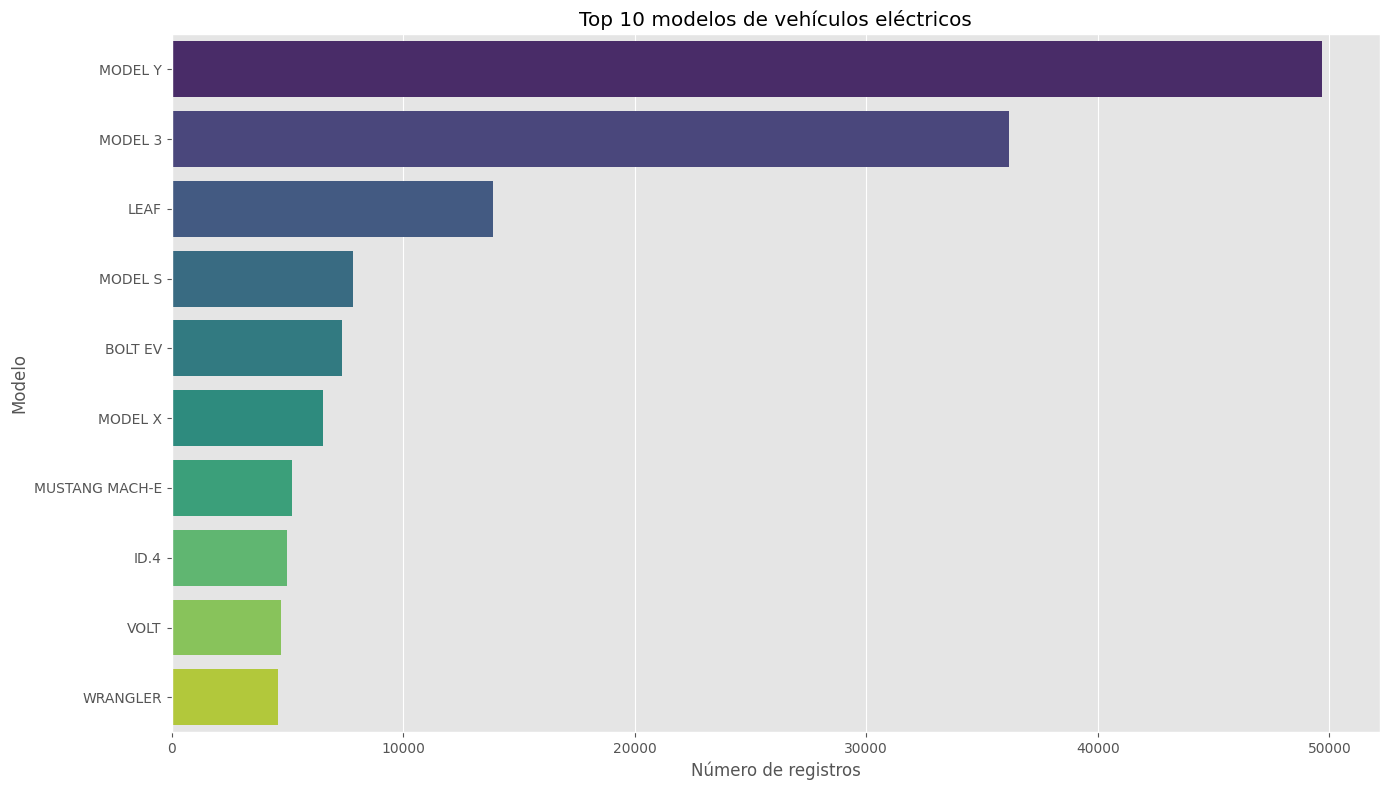

C:\Users\gfisc\AppData\Local\Temp\ipykernel_15212\2355740982.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cafv_by_county.values, y=cafv_by_county.index, palette='coolwarm')


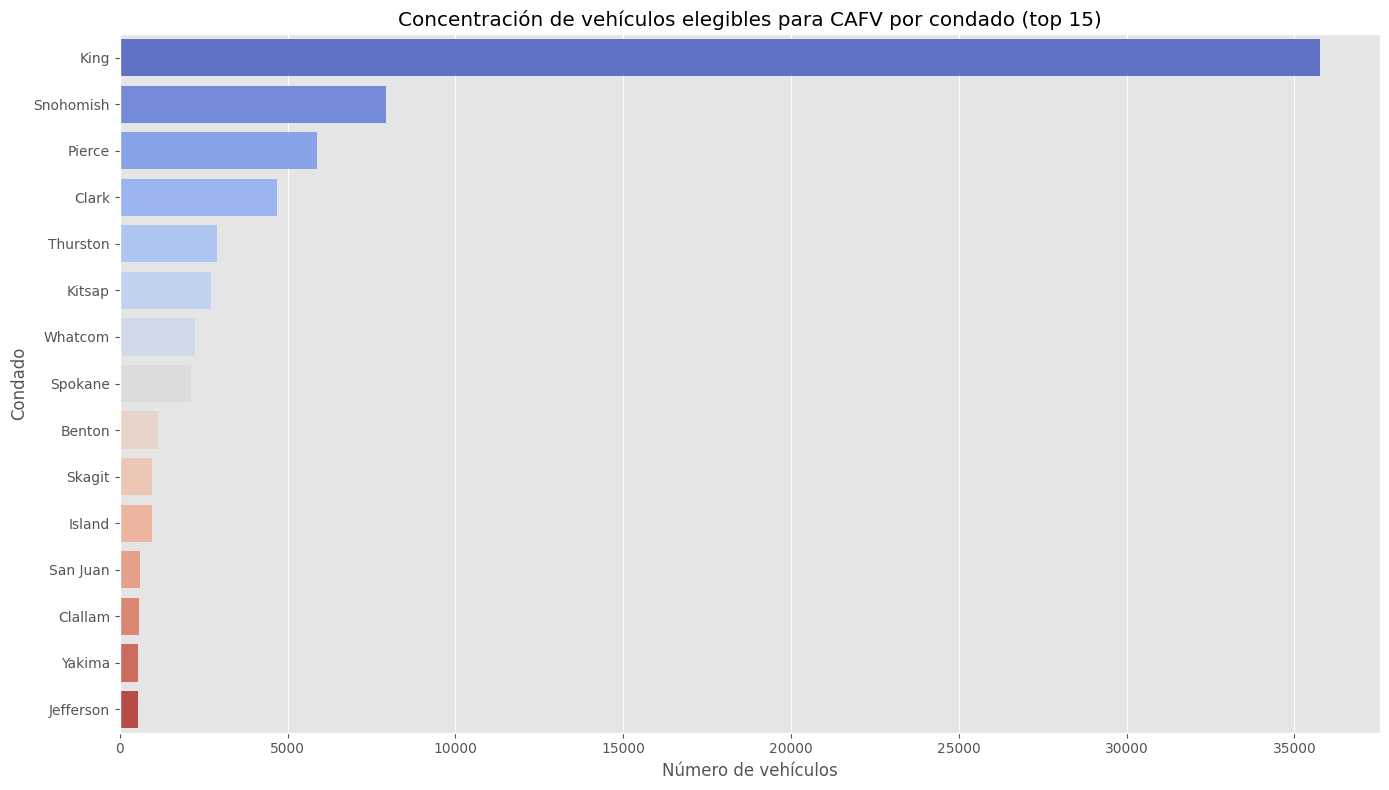

C:\Users\gfisc\AppData\Local\Temp\ipykernel_15212\2355740982.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cafv_by_state.values, y=cafv_by_state.index, palette='coolwarm')


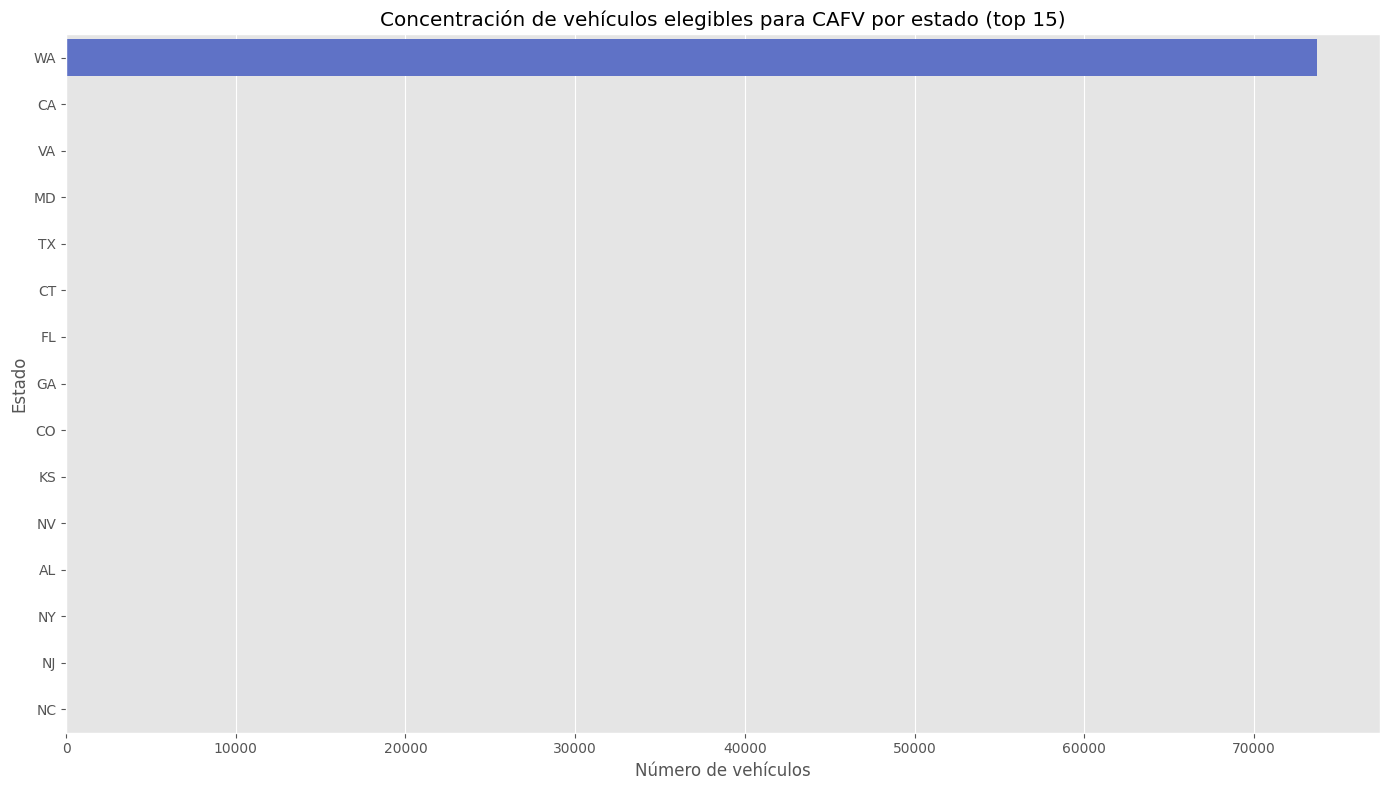

C:\Users\gfisc\AppData\Local\Temp\ipykernel_15212\2355740982.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cafv_unknown_by_county.values, y=cafv_unknown_by_county.index, palette='coolwarm')


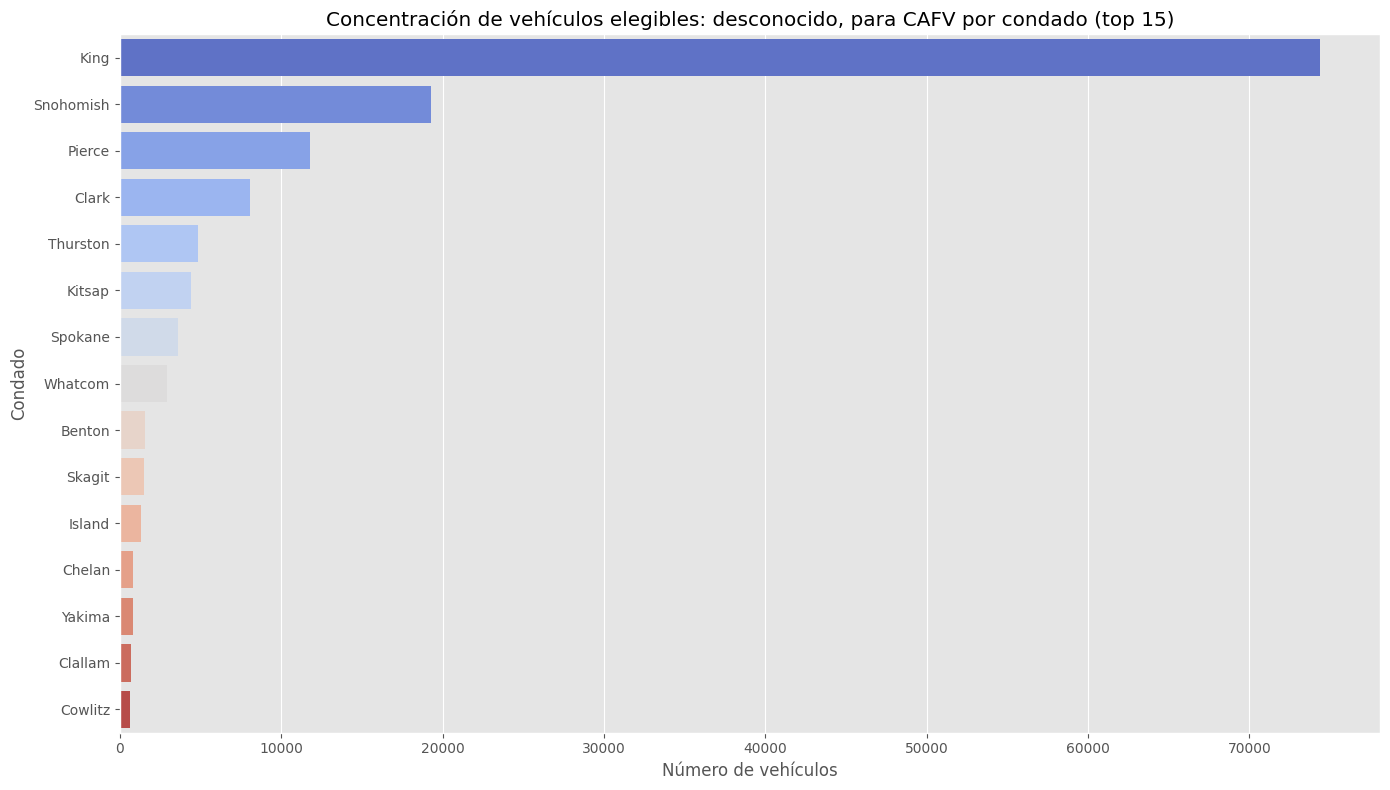

C:\Users\gfisc\AppData\Local\Temp\ipykernel_15212\2355740982.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cafv_unknown_by_state.values, y=cafv_unknown_by_state.index, palette='coolwarm')


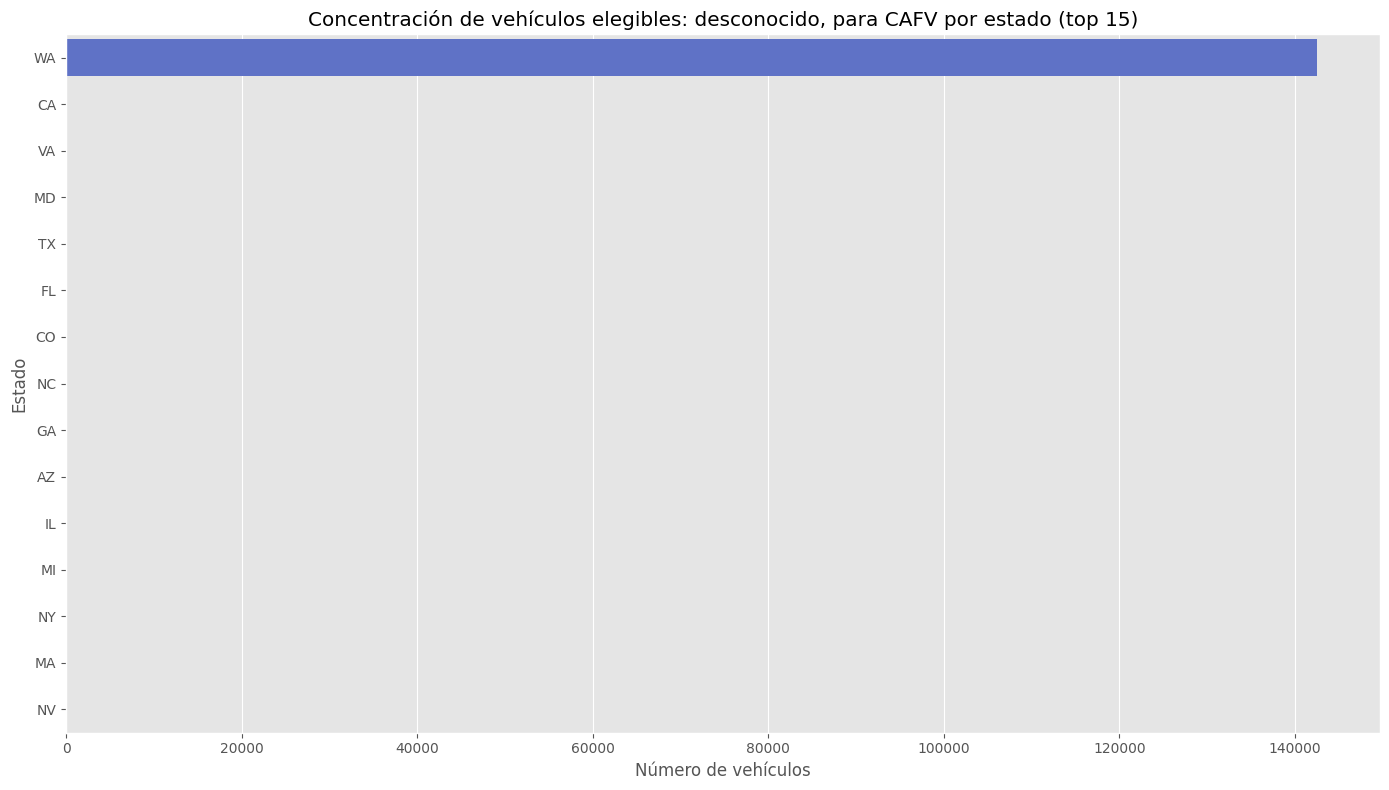


Cambio año tras año en registros de vehículos eléctricos por condado:


Model Year,2000,2002,2003,2008,2010,2011,2012,2013,2014,2015,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026
County,,,,,,,,,,,,,,,,,,,,,
Ada,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Adams,0,0,0,0,0,1,1,1,2,3,...,3,5,4,7,7,10,20,16,2,0
Alameda,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,2,1,4,0,0,0
Albemarle,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Alexandria,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Williamson,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
Wise,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Yakima,0,0,0,0,0,7,24,30,37,17,...,59,112,65,76,178,212,311,319,77,0


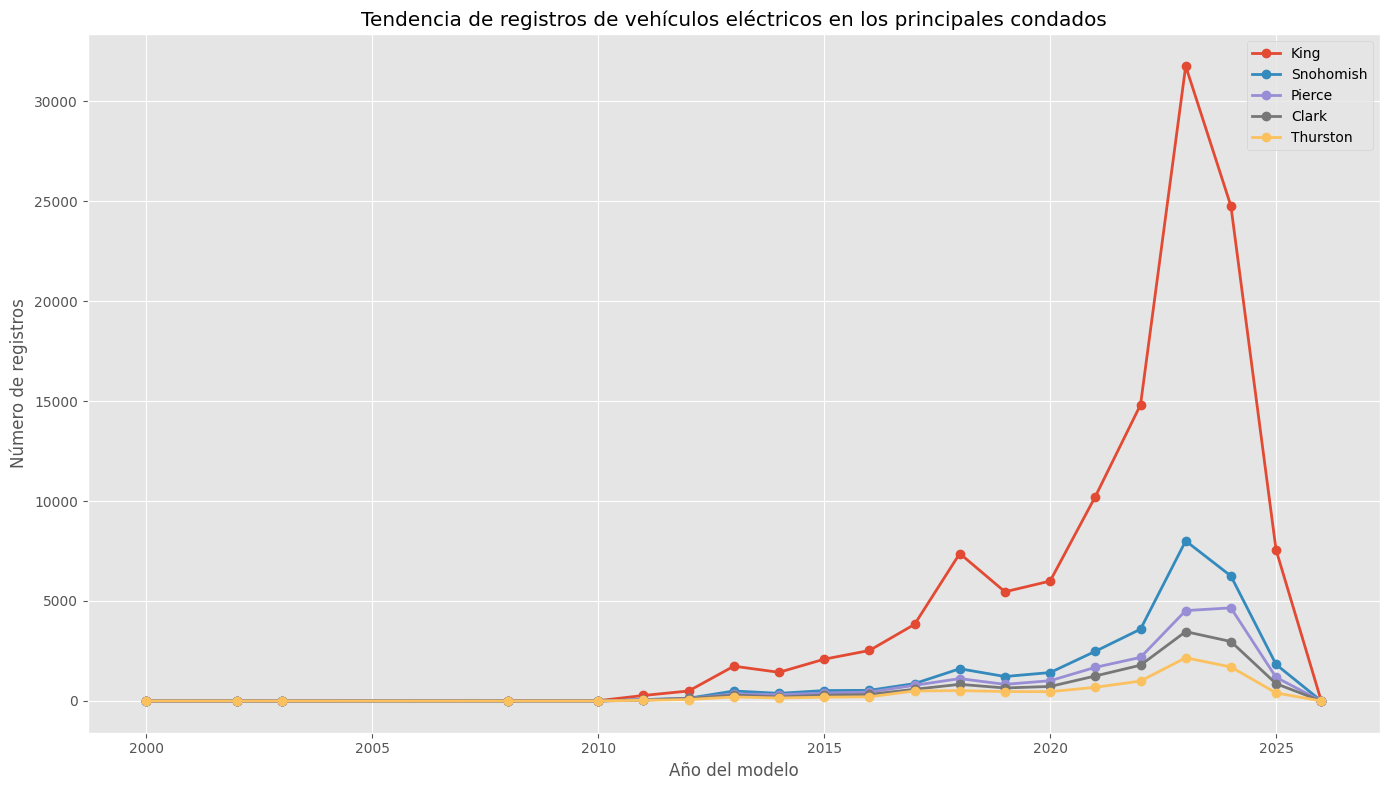

C:\Users\gfisc\AppData\Local\Temp\ipykernel_15212\2355740982.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes.values, y=top_makes.index, palette='tab10')


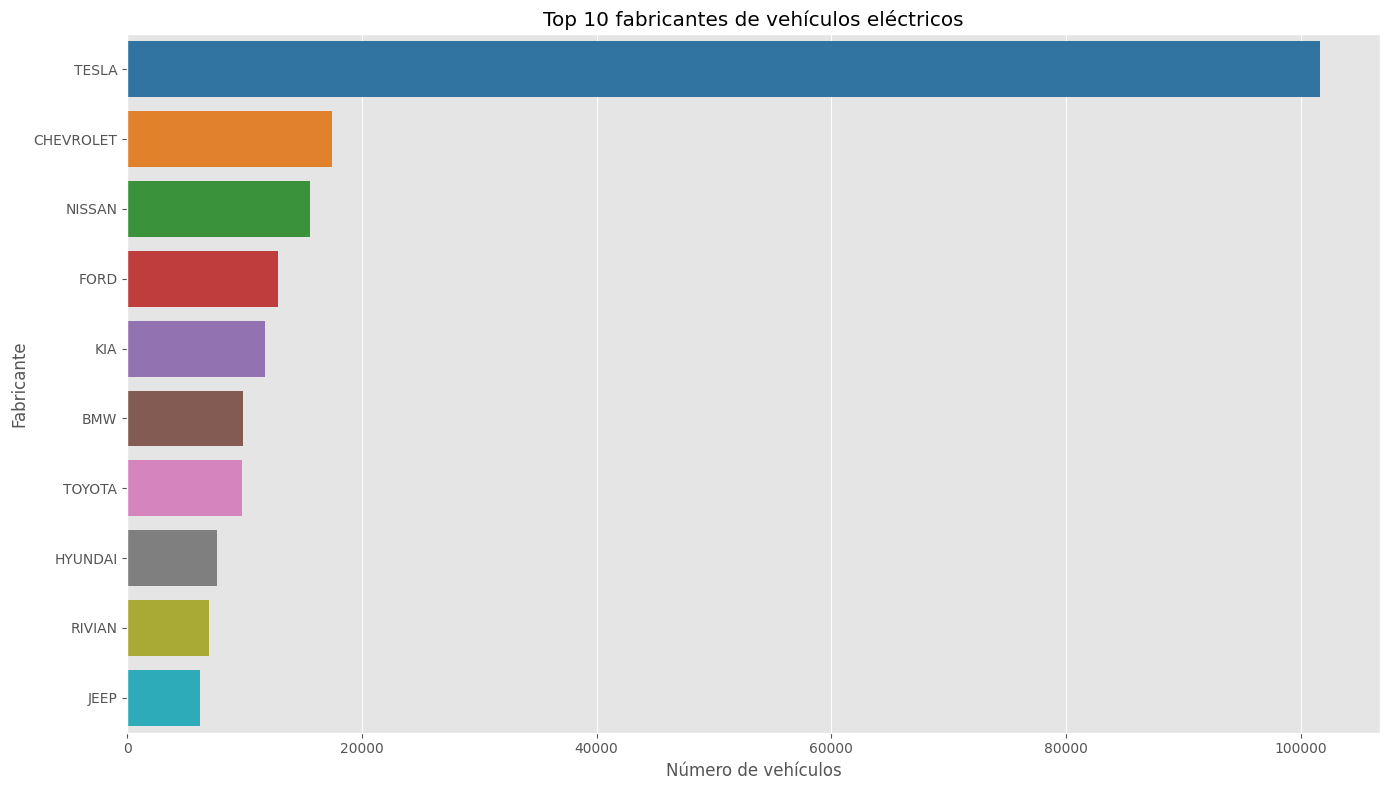

<Figure size 1600x800 with 0 Axes>

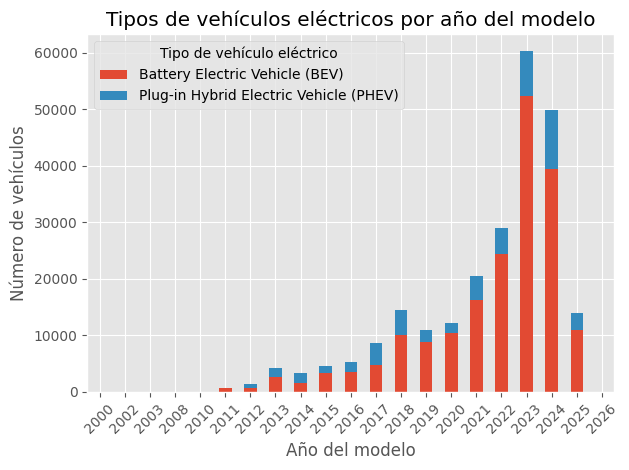

In [12]:
## Análisis rapido de preguntas específicas

# 1. ¿Cuántos vehículos eléctricos están registrados por año?
# Si bien no hay una columna que indique el año de registro, utilizaremos la columna 'Model Year', la cual indica el año de fabricacion
# para analizar los registros por año de modelo.

yearly_registrations = df['Model Year'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
yearly_registrations.plot(kind='bar')
plt.title('Número de vehículos eléctricos registrados por año de modelo')
plt.xlabel('Año del modelo')
plt.ylabel('Número de registros')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. ¿Cuáles son los 10 principales modelos de vehículos eléctricos?

top_models = df['Model'].value_counts().head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_models.values, y=top_models.index, palette='viridis')
plt.title('Top 10 modelos de vehículos eléctricos')
plt.xlabel('Número de registros')
plt.ylabel('Modelo')
plt.tight_layout()
plt.show()

# 3. ¿Dónde se concentran geográficamente los vehículos elegibles para CAFV?

   
cafv_eligible = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible']
cafv_by_county = cafv_eligible['County'].value_counts().head(15)
cafv_by_state = cafv_eligible['State'].value_counts().head(15)


plt.figure(figsize=(14, 8))
sns.barplot(x=cafv_by_county.values, y=cafv_by_county.index, palette='coolwarm')
plt.title('Concentración de vehículos elegibles para CAFV por condado (top 15)')
plt.xlabel('Número de vehículos')
plt.ylabel('Condado')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x=cafv_by_state.values, y=cafv_by_state.index, palette='coolwarm')
plt.title('Concentración de vehículos elegibles para CAFV por estado (top 15)')
plt.xlabel('Número de vehículos')
plt.ylabel('Estado')
plt.tight_layout()
plt.show()

# 3-2. ¿Dónde se concentran geográficamente los vehículos elegibles desconocido para CAFV?
cafv_unknown = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Eligibility unknown as battery range has not been researched']
cafv_unknown_by_county = cafv_unknown['County'].value_counts().head(15)
cafv_unknown_by_state = cafv_unknown['State'].value_counts().head(15)


plt.figure(figsize=(14, 8))
sns.barplot(x=cafv_unknown_by_county.values, y=cafv_unknown_by_county.index, palette='coolwarm')
plt.title('Concentración de vehículos elegibles: desconocido, para CAFV por condado (top 15)')
plt.xlabel('Número de vehículos')
plt.ylabel('Condado')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x=cafv_unknown_by_state.values, y=cafv_unknown_by_state.index, palette='coolwarm')
plt.title('Concentración de vehículos elegibles: desconocido, para CAFV por estado (top 15)')
plt.xlabel('Número de vehículos')
plt.ylabel('Estado')
plt.tight_layout()
plt.show()


# 4. ¿Cuál es el cambio año tras año en los registros de vehículos eléctricos por condado?



# Crear una tabla pivote para ver el cambio año tras año por condado
pivot_table = pd.pivot_table(
    df, 
    values='DOL Vehicle ID', 
    index=['County'], 
    columns=['Model Year'], 
    aggfunc='count',
    fill_value=0
)

print("\nCambio año tras año en registros de vehículos eléctricos por condado:")
display(pivot_table)

# Seleccionar los 5 condados más grandes para visualizar
top_counties = df['County'].value_counts().head(5).index
plt.figure(figsize=(14, 8))

for county in top_counties:
    if county in pivot_table.index:
        plt.plot(pivot_table.columns, pivot_table.loc[county], marker='o', linewidth=2, label=county)

plt.title('Tendencia de registros de vehículos eléctricos en los principales condados')
plt.xlabel('Año del modelo')
plt.ylabel('Número de registros')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Análisis adicionales

# Distribución de vehículos por fabricante
if 'Make' in df.columns:
    top_makes = df['Make'].value_counts().head(10)
    
    plt.figure(figsize=(14, 8))
    sns.barplot(x=top_makes.values, y=top_makes.index, palette='tab10')
    plt.title('Top 10 fabricantes de vehículos eléctricos')
    plt.xlabel('Número de vehículos')
    plt.ylabel('Fabricante')
    plt.tight_layout()
    plt.show()

# Relación entre año del modelo y tipo de vehículo eléctrico
if 'Model Year' in df.columns and 'Electric Vehicle Type' in df.columns:
    plt.figure(figsize=(16, 8))
    ev_type_by_year = pd.crosstab(df['Model Year'], df['Electric Vehicle Type'])
    ev_type_by_year.plot(kind='bar', stacked=True)
    plt.title('Tipos de vehículos eléctricos por año del modelo')
    plt.xlabel('Año del modelo')
    plt.ylabel('Número de vehículos')
    plt.legend(title='Tipo de vehículo eléctrico')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



In [126]:

df_cafv_not_Eligible['Electric Vehicle Type'].value_counts()
display(df_cafv_not_Eligible[df_cafv_not_Eligible['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)'])

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,DOL Vehicle ID,Vehicle Location
72786,King,Seattle,WA,2019,HYUNDAI,IONIQ,Battery Electric Vehicle (BEV),Not eligible due to low battery range,29.0,109693475,POINT (-122.30866 47.57874)
131283,Pierce,Tacoma,WA,2019,HYUNDAI,IONIQ,Battery Electric Vehicle (BEV),Not eligible due to low battery range,29.0,185605010,POINT (-122.41249 47.21584)
149536,Pierce,Auburn,WA,2019,HYUNDAI,IONIQ,Battery Electric Vehicle (BEV),Not eligible due to low battery range,29.0,273886287,POINT (-122.1821 47.3199)
162102,Thurston,Olympia,WA,2019,HYUNDAI,IONIQ,Battery Electric Vehicle (BEV),Not eligible due to low battery range,29.0,208971129,POINT (-122.89166 47.03956)
182670,Island,Camano Island,WA,2019,HYUNDAI,IONIQ,Battery Electric Vehicle (BEV),Not eligible due to low battery range,29.0,252448913,POINT (-122.40049 48.23986)
222263,Mason,Shelton,WA,2019,HYUNDAI,IONIQ,Battery Electric Vehicle (BEV),Not eligible due to low battery range,29.0,272771159,POINT (-123.10565 47.21248)
228738,King,Federal Way,WA,2019,HYUNDAI,IONIQ,Battery Electric Vehicle (BEV),Not eligible due to low battery range,29.0,179814883,POINT (-122.3303 47.30151)
234615,Snohomish,Lynnwood,WA,2019,HYUNDAI,IONIQ,Battery Electric Vehicle (BEV),Not eligible due to low battery range,29.0,256190434,POINT (-122.29245 47.82557)


In [127]:
display(df[df['Model'] == 'IONIQ'])

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,DOL Vehicle ID,Vehicle Location
154,Kitsap,Bremerton,WA,2020,HYUNDAI,IONIQ,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,170.0,270084895,POINT (-122.60915 47.62631)
992,King,Kirkland,WA,2019,HYUNDAI,IONIQ,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,124.0,478553316,POINT (-122.22901 47.72201)
1757,King,Kent,WA,2020,HYUNDAI,IONIQ,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,170.0,267592195,POINT (-122.19975 47.37483)
1771,Thurston,Olympia,WA,2021,HYUNDAI,IONIQ,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,218232437,POINT (-122.89166 47.03956)
2651,King,Shoreline,WA,2019,HYUNDAI,IONIQ,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,29.0,144349670,POINT (-122.3175 47.75781)
...,...,...,...,...,...,...,...,...,...,...,...
236319,Skagit,Concrete,WA,2019,HYUNDAI,IONIQ,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,124.0,228264067,POINT (-121.7515 48.53892)
236711,Clark,Vancouver,WA,2022,HYUNDAI,IONIQ,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,29.0,238016502,POINT (-122.67156 45.63248)
236753,King,Seattle,WA,2020,HYUNDAI,IONIQ,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,29.0,271840614,POINT (-122.31676 47.68156)
237935,King,Seattle,WA,2020,HYUNDAI,IONIQ,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,29.0,100537846,POINT (-122.32427 47.63433)


In [128]:
df_cafv_Eligible['Electric Vehicle Type'].value_counts()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            47192
Plug-in Hybrid Electric Vehicle (PHEV)    26713
Name: count, dtype: int64

In [8]:
# Cargar el dataset
FILE_NAME = 'vehicles_by_year.csv'
FILE_PATH = Path("../data/processed/power_bi") / FILE_NAME
df = pd.read_csv(FILE_PATH)



# Mostrar las primeras filas del DataFrame
print("\nPrimeras 5 filas del dataset:")
display(df.head())


Primeras 5 filas del dataset:


,registration_year,vehicle_count
0,2000.0,7
1,2002.0,2
2,2003.0,1
3,2008.0,20
4,2010.0,23
